### Esse notebook tem como intuito responder a seguinte pergunta:
### Qual foi a tendência da qualidade do ar nos últimos anos no Rio de Janeiro?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
df = pd.read_csv('Qualidade_do_ar_-_Dados_horA1rios.csv')

In [3]:
df.sort_values('Data')  # data range: 2011/01/01 00:30 - 2021/03/31 23:30

,Data,CodNum,Estação,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO,NOx,O3,PM10,PM2_5,Lat,Lon,X_UTM_Sirgas2000,Y_UTM_Sirgas2000,OBJECTID
326721,2011/01/01 00:30:00+00,7,SC,0.0,1009.60,2.87,26.66,90.73,180.00,0.47,...,NaN,NaN,8.47,8.00,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,326722
387058,2011/01/01 00:30:00+00,8,SP,0.0,1007.45,6.40,20.91,89.49,176.83,2.92,...,NaN,NaN,5.08,44.05,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,387059
103079,2011/01/01 00:30:00+00,3,CA,0.2,1009.33,1.57,21.81,84.50,250.67,0.34,...,NaN,NaN,17.89,10.00,NaN,-22.908344,-43.178152,686853.7075,7.465470e+06,103080
163229,2011/01/01 00:30:00+00,1,AV,0.0,1009.52,0.70,24.09,79.79,157.00,0.90,...,NaN,NaN,3.68,34.64,NaN,-22.965004,-43.180482,686537.0128,7.459198e+06,163230
387059,2011/01/01 01:30:00+00,8,SP,0.0,1006.57,6.50,20.53,92.83,211.17,2.82,...,NaN,NaN,11.90,55.89,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,387060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661660,2021/03/31 22:30:00+00,8,SP,1.2,1008.85,0.00,20.80,74.52,292.00,0.60,...,2.46,9.19,29.33,28.97,NaN,-22.924915,-43.232657,681240.2399,7.463703e+06,661663
655125,2021/03/31 23:30:00+00,7,SC,3.4,1009.57,0.00,24.52,79.97,111.83,1.03,...,NaN,NaN,28.27,23.00,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,655128
642176,2021/03/31 23:30:00+00,5,IR,0.2,1010.15,7.00,23.40,97.57,308.17,1.23,...,4.29,37.53,12.21,43.00,20.0,-22.831621,-43.326845,671696.6238,7.474147e+06,642179
648598,2021/03/31 23:30:00+00,6,PG,0.2,1010.98,1.00,NaN,96.87,NaN,NaN,...,NaN,NaN,45.56,19.00,NaN,-23.004379,-43.629010,640505.9556,7.455338e+06,648601


### Filtrando dados do período janeiro-março entre 2015-2020

In [8]:
df_2015 = df.loc[(df['Data'].str.contains('2015/01')) | (df['Data'].str.contains('2015/02')) | (df['Data'].str.contains('2015/03'))]
df_2016 = df.loc[(df['Data'].str.contains('2016/01')) | (df['Data'].str.contains('2016/02')) | (df['Data'].str.contains('2016/03'))]
df_2017 = df.loc[(df['Data'].str.contains('2017/01')) | (df['Data'].str.contains('2017/02')) | (df['Data'].str.contains('2017/03'))]
df_2018 = df.loc[(df['Data'].str.contains('2018/01')) | (df['Data'].str.contains('2018/02')) | (df['Data'].str.contains('2017/08'))]
df_2019 = df.loc[(df['Data'].str.contains('2019/01')) | (df['Data'].str.contains('2019/02')) | (df['Data'].str.contains('2019/03'))]
df_2020 = df.loc[(df['Data'].str.contains('2020/01')) | (df['Data'].str.contains('2020/02')) | (df['Data'].str.contains('2020/03'))]

df_2015_19 = df.loc[~(df['Data'].str.contains('2011'))]
df_2015_19 = df_2015_19.loc[~((df_2015_19['Data'].str.contains('2012')) | (df_2015_19['Data'].str.contains('2013')) | (df_2015_19['Data'].str.contains('2014')) | (df_2015_19['Data'].str.contains('2020')) | (df_2015_19['Data'].str.contains('2021')))]
df_2015_19 = df_2015_19.loc[~((df_2015_19['Data'].str.contains('2019/04')) | (df_2015_19['Data'].str.contains('2019/05')) |(df_2015_19['Data'].str.contains('2019/06')))]
df_2015_19 = df_2015_19.loc[~((df_2015_19['Data'].str.contains('2019/07')) | (df_2015_19['Data'].str.contains('2019/08')) | (df_2015_19['Data'].str.contains('2019/09')))]
df_2015_19 = df_2015_19.loc[~((df_2015_19['Data'].str.contains('2019/10')) | (df_2015_19['Data'].str.contains('2019/11')) | (df_2015_19['Data'].str.contains('2019/12')))]

df_2015_20 = df.loc[~(df['Data'].str.contains('2011'))]
df_2015_20 = df_2015_20.loc[~((df['Data'].str.contains('2012')) | (df['Data'].str.contains('2013')) | (df['Data'].str.contains('2014')) | (df['Data'].str.contains('2021')))]
df_2015_20 = df_2015_20.loc[~((df_2015_20['Data'].str.contains('2020/04')) | (df_2015_20['Data'].str.contains('2020/05')) |(df_2015_20['Data'].str.contains('2020/06')))]
df_2015_20 = df_2015_20.loc[~((df_2015_20['Data'].str.contains('2020/07')) | (df_2015_20['Data'].str.contains('2020/08')) |(df_2015_20['Data'].str.contains('2020/09')))]
df_2015_20 = df_2015_20.loc[~((df_2015_20['Data'].str.contains('2020/10')) | (df_2015_20['Data'].str.contains('2020/11')) |(df_2015_20['Data'].str.contains('2020/12')))]


df_2015_20

,Data,CodNum,Estação,Chuva,Pres,RS,Temp,UR,Dir_Vento,Vel_Vento,...,NO,NOx,O3,PM10,PM2_5,Lat,Lon,X_UTM_Sirgas2000,Y_UTM_Sirgas2000,OBJECTID
25706,2015/01/01 00:30:00+00,2,BG,0.0,1005.95,1.17,27.32,56.48,272.50,3.50,...,2.00,16.29,43.54,106.0,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25707
25707,2015/01/01 01:30:00+00,2,BG,0.0,1005.23,0.67,27.28,54.53,277.67,2.23,...,1.47,15.88,47.87,31.0,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25708
25708,2015/01/01 02:30:00+00,2,BG,0.0,1005.35,1.00,26.68,58.13,263.83,2.92,...,1.87,14.89,47.74,33.0,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25709
25709,2015/01/01 03:30:00+00,2,BG,0.0,1005.25,1.00,27.32,54.17,258.00,3.52,...,NaN,NaN,50.85,28.0,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25710
25710,2015/01/01 04:30:00+00,2,BG,0.0,1005.65,0.83,28.08,49.92,255.17,2.97,...,NaN,NaN,57.11,10.0,NaN,-22.887910,-43.471074,656828.8045,7.468075e+06,25711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608973,2020/03/31 19:30:00+00,7,SC,0.0,1013.67,0.00,25.97,87.32,256.83,1.33,...,NaN,NaN,40.00,16.0,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,608976
608974,2020/03/31 20:30:00+00,7,SC,0.0,1014.38,0.00,25.83,87.38,268.83,1.05,...,NaN,NaN,40.73,10.0,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,608977
608975,2020/03/31 21:30:00+00,7,SC,0.0,1014.62,0.00,25.87,86.17,321.00,0.93,...,NaN,NaN,42.01,8.0,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,608978
608976,2020/03/31 22:30:00+00,7,SC,0.0,1014.75,0.00,25.87,86.97,189.17,0.70,...,NaN,NaN,38.20,8.0,NaN,-22.897771,-43.221745,682395.7505,7.466695e+06,608979


In [10]:
df_sp = df_2015.loc[df_2015['Estação'] == 'SP']
df_co_sp = df_sp[['Data','CO']].dropna()

df_sp_2016 = df_2016.loc[df_2016['Estação'] == 'SP']
df_co_sp_2016 = df_sp_2016[['Data','CO']].dropna()

df_sp_2017 = df_2017.loc[df_2017['Estação'] == 'SP']
df_co_sp_2017 = df_sp_2017[['Data', 'CO']].dropna()

df_sp_2018 = df_2018.loc[df_2018['Estação'] == 'SP']
df_co_sp_2018 = df_sp_2018[['Data','CO']].dropna()

df_sp_2019 = df_2019.loc[df_2019['Estação'] == 'SP']
df_co_sp_2019 = df_sp_2019[['Data','CO']].dropna()

df_sp_2020 = df_2020.loc[df_2020['Estação'] == 'SP']
df_co_sp_2020 = df_sp_2020[['Data','CO']].dropna()

df_sp_2015_19 = df_2015_19.loc[df_2015_19['Estação'] == 'SP']
df_co_sp_2015_19 = df_sp_2015_19[['Data','CO']].dropna()

df_sp_2015_20 = df_2015_20.loc[df_2015_20['Estação'] == 'SP']
df_co_sp_2015_20 = df_sp_2015_20[['Data','CO']].dropna()

df_co_sp_2015_20

,Data,CO
421517,2015/01/01 00:30:00+00,0.56
421518,2015/01/01 01:30:00+00,0.57
421519,2015/01/01 02:30:00+00,0.56
421520,2015/01/01 03:30:00+00,0.51
421521,2015/01/01 04:30:00+00,0.44
...,...,...
578204,2019/03/31 19:30:00+00,0.30
578205,2019/03/31 20:30:00+00,0.29
578206,2019/03/31 21:30:00+00,0.29
578207,2019/03/31 22:30:00+00,0.24


### Criando gráficos

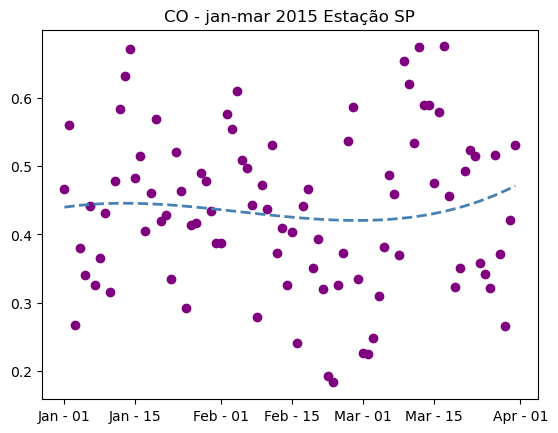

In [8]:
df_co_sp['CO'] = df_co_sp['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_dia = df_co_sp.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_sp_dia['Data'] = df_co_sp_dia.index

x = np.linspace(0,1, len(df_co_sp_dia['Data']))
y = np.array(df_co_sp_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_dia['Data'], df_co_sp_dia['CO'], color='purple')
plt.plot(df_co_sp_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2015 Estação SP")

fmt = mdates.DateFormatter('%b - %d')
plt.gca().xaxis.set_major_formatter(fmt)


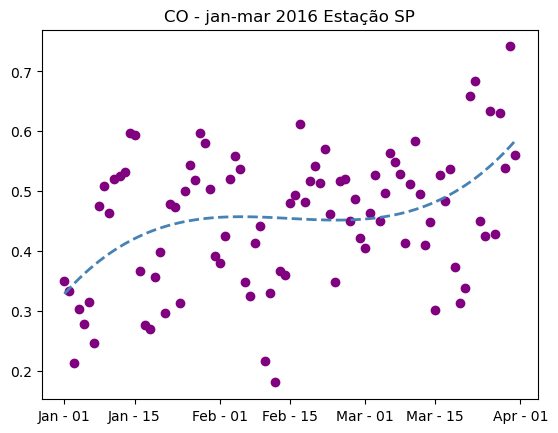

In [31]:
df_co_sp_2016['CO'] = df_co_sp_2016['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp_2016['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_2016_dia = df_co_sp_2016.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_sp_2016_dia['Data'] = df_co_sp_2016_dia.index

x = np.linspace(0,1, len(df_co_sp_2016_dia['Data']))
y = np.array(df_co_sp_2016_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_2016_dia['Data'], df_co_sp_2016_dia['CO'], color='purple')
plt.plot(df_co_sp_2016_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2016 Estação SP")

fmt = mdates.DateFormatter('%b - %d')
plt.gca().xaxis.set_major_formatter(fmt)


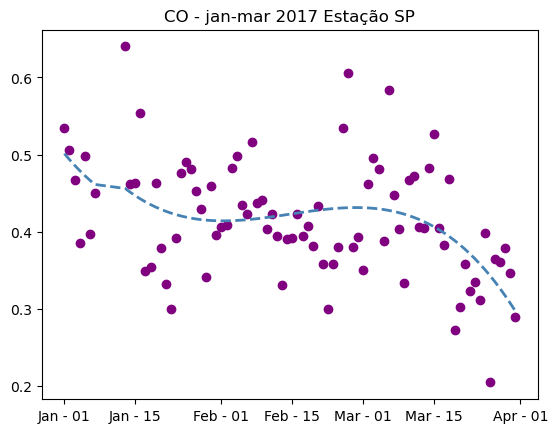

In [35]:
df_co_sp_2017['CO'] = df_co_sp_2017['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp_2017['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_2017_dia = df_co_sp_2017.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_sp_2017_dia['Data'] = df_co_sp_2017_dia.index

x = np.linspace(0,1, len(df_co_sp_2017_dia['Data']))
y = np.array(df_co_sp_2017_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_2017_dia['Data'], df_co_sp_2017_dia['CO'], color='purple')
plt.plot(df_co_sp_2017_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2017 Estação SP")

fmt = mdates.DateFormatter('%b - %d')
plt.gca().xaxis.set_major_formatter(fmt)

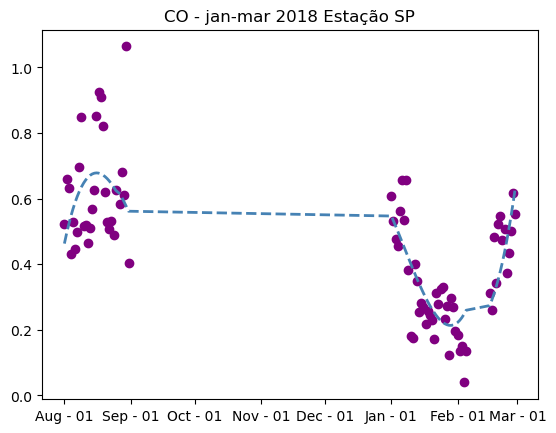

In [44]:
df_co_sp_2018['CO'] = df_co_sp_2018['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp_2018['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_2018_dia = df_co_sp_2018.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_sp_2018_dia['Data'] = df_co_sp_2018_dia.index

x = np.linspace(0,1, len(df_co_sp_2018_dia['Data']))
y = np.array(df_co_sp_2018_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_2018_dia['Data'], df_co_sp_2018_dia['CO'], color='purple')
plt.plot(df_co_sp_2018_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2018 Estação SP")

fmt = mdates.DateFormatter('%b - %d')
plt.gca().xaxis.set_major_formatter(fmt)

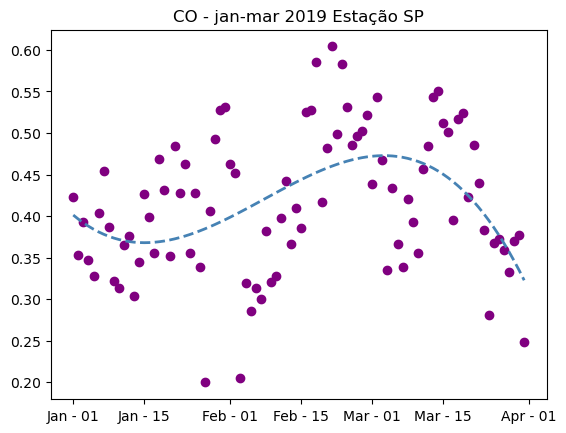

In [45]:
df_co_sp_2019['CO'] = df_co_sp_2019['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp_2019['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_2019_dia = df_co_sp_2019.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_sp_2019_dia['Data'] = df_co_sp_2019_dia.index

x = np.linspace(0,1, len(df_co_sp_2019_dia['Data']))
y = np.array(df_co_sp_2019_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_2019_dia['Data'], df_co_sp_2019_dia['CO'], color='purple')
plt.plot(df_co_sp_2019_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2019 Estação SP")

fmt = mdates.DateFormatter('%b - %d')
plt.gca().xaxis.set_major_formatter(fmt)

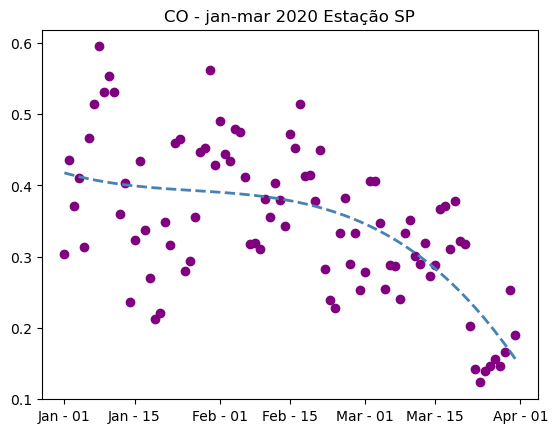

In [46]:
df_co_sp_2020['CO'] = df_co_sp_2020['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp_2020['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_2020_dia = df_co_sp_2020.resample('d', on='Data').mean().dropna(how='all').copy()

df_co_sp_2020_dia['Data'] = df_co_sp_2020_dia.index

x = np.linspace(0,1, len(df_co_sp_2020_dia['Data']))
y = np.array(df_co_sp_2020_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_2020_dia['Data'], df_co_sp_2020_dia['CO'], color='purple')
plt.plot(df_co_sp_2020_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan-mar 2020 Estação SP")

fmt = mdates.DateFormatter('%b - %d')
plt.gca().xaxis.set_major_formatter(fmt)

Text(0.5, 1.0, 'CO - jan 2015 - mar 2020 Estação SP')

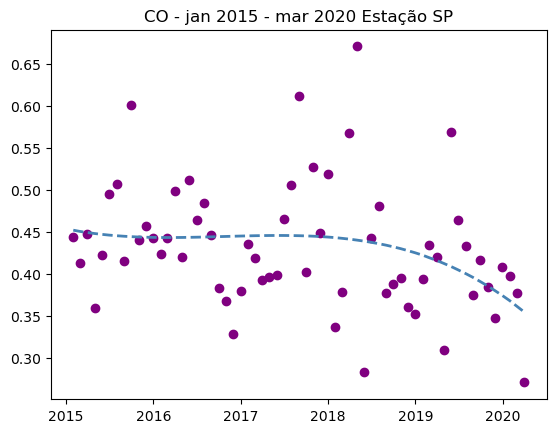

In [15]:
df_co_sp_2015_20['CO'] = df_co_sp_2015_20['CO'].apply(pd.to_numeric, errors='coerce')
df_co_sp_2015_20['Data'] = pd.to_datetime(df['Data'], format='%Y/%m/%d %H:%M:%S+%f')

df_co_sp_2015_20_dia = df_co_sp_2015_20.resample('m', on='Data').mean().dropna(how='all').copy()

df_co_sp_2015_20_dia['Data'] = df_co_sp_2015_20_dia.index

x = np.linspace(0,1, len(df_co_sp_2015_20_dia['Data']))
y = np.array(df_co_sp_2015_20_dia['CO'])

# encontrando a linha de best-fit
coeffs = np.polyfit(x,y,3)
poly_eqn = np.poly1d(coeffs)
y_hat = poly_eqn(x)

plt.scatter(df_co_sp_2015_20_dia['Data'], df_co_sp_2015_20_dia['CO'], color='purple')
plt.plot(df_co_sp_2015_20_dia['Data'], y_hat, color='steelblue', linestyle='--', linewidth=2)
plt.title("CO - jan 2015 - mar 2020 Estação SP")